# Neuronale Netze

## Aufgabe 1: Tensorflow Playground

Wir möchten uns mit dem Verhalten von neuronalen Netzen vertraut machen

1. Gehen Sie auf https://playground.tensorflow.org 
2. Machen Sie sich mit den Features vertraut
3. Was kodieren die Farben Blau und Orange?

Blau zeigt positive Werte und Orange negative Werte. Sowohl bei den Gewichten als im Output. 

4. Wie werden die Punkte klassifiziert?

Wie in der Vorlesung gezeigt wird bei binärer Klassifikation die Sigmoid Funktion verwendet und anschließend ein Tresholding (um auf -1 oder 1 zu runden)

5. Wie können Sie sehen welche Feature Importance das Modell errechnet hat?

Die Größe der Gewichte entspricht der dicke der Linien im Modell, um so größer (im Absolutbetrag) diese sind um so wichtiger erachtet das Modell diese.

6. Welche der gezeigten Feature Engineering Methoden kennen Sie bereits?

Implementiert haben wir bereits die Polynomiellen Features $X_1^2$, $X_2^2$, $X_1 X_2$. $sin(X_1), sin(X_2)$ haben wir nicht explizit gesehen. Dieses ist hilfreich, wenn die Daten spiralförmig angeordnet sind.

7. Versuchen Sie verschiedene Parameter auf verschiedenen Datensätzen und beobachten Sie die Modelle um ein Gefühl für das Verhalten zu bekommen.

    - Generell gilt: mehr Layer und Neuronen sorgen für flexiblere Modelle, aber das Training dauert lang. Regularisierung ist bei vielen Layern und Neuronen wichtig. Die Learning Rate kann zu hoch eingestellt sein, dass konvergiert das Modell nicht. Wenn die LR zu gering ist konvergiert das Modell nur sehr langsam. 

    - Man kann den Variance / Bias Tradeoff für viele Parameter gut sehen. 

    - Das Training mit ReLU ist schneller als mit z.B. tanh.

8. Deep Learning. Wenn Sie die Anzahl der Hidden Layer stark erhöhen spricht man von _Deep Learning_. Probieren Sie aus ob Sie mit Deep Learning und nur den Features $X_1$ und $X_2$ die spiralförmigen Datensätze separieren können.

Die vielen Layer sorgen dafür, dass das Modell deutlich flexibler wird und somit auch Sinus und Kosinus approximiert werden kann. Deep Learning ist sehr mächtig, neight aber auch wie die Random Forests zu overfitting. Zudem kommen Schwierigkeiten beim Training der Modelle (vanishing / exploding Gradients, sehr große Modelle die nur langsam Trainieren) und noch vieles mehr. Die meisten Probleme sind heutzutage aber lösbar und haben Mitigationsstrategien.

# Aufgabe 2: MNIST

MNIST steht für Modified National Institute of Standards and Technology database und enthält Bilder von Zahlen die von Handschriften stammen. Diese mit neuronalen Netzen zu erkennen gilt als das "Hello World" von Bilderkennung mit Machine Learning.

1. Laden Sie die Daten und analysieren Sie diese (datentyp, plotting etc)
2. Machen Sie einen Test/Traning Split der Daten
3. Bauen Sie eine Pipeline mit dem `MLPClassifier`
4. Sehen Sie wie gut Sie abschneiden mit verschiedenen Netztopologien und messen Sie diese mit `classification_report`. 

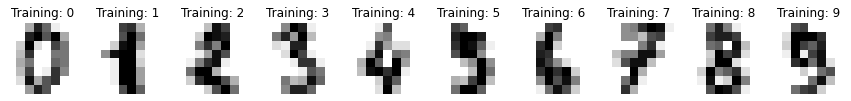

In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mnist = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 6))
for ax, image, label in zip(axes, mnist.images, mnist.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [33]:
n = len(mnist.images)
X = mnist.images.reshape((n, -1))  # flatten
y = mnist.target


X_train, X_test, y_train, y_test = train_test_split(X, y)


clf = MLPClassifier(random_state=0, max_iter=300)
pipe = Pipeline([("scaler", MinMaxScaler()), ("NN", clf)])
pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)

print(metrics.classification_report(y_test, predicted, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9796    0.9897        49
           1     0.9400    1.0000    0.9691        47
           2     0.9615    0.9804    0.9709        51
           3     0.9474    0.9474    0.9474        38
           4     0.9744    1.0000    0.9870        38
           5     0.9773    0.9773    0.9773        44
           6     0.9744    0.9744    0.9744        39
           7     1.0000    0.9808    0.9903        52
           8     0.9487    0.9024    0.9250        41
           9     0.9800    0.9608    0.9703        51

    accuracy                         0.9711       450
   macro avg     0.9704    0.9703    0.9701       450
weighted avg     0.9714    0.9711    0.9710       450



In [37]:
clf = MLPClassifier(random_state=0, max_iter=300, hidden_layer_sizes=(100, 100, 100))

pipe = Pipeline([("scaler", MinMaxScaler()), ("NN", clf)])
pipe.fit(X_train, y_train)

predicted = pipe.predict(X_test)

print(metrics.classification_report(y_test, predicted, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9796    0.9897        49
           1     0.9400    1.0000    0.9691        47
           2     0.9808    1.0000    0.9903        51
           3     0.9730    0.9474    0.9600        38
           4     0.9744    1.0000    0.9870        38
           5     0.9773    0.9773    0.9773        44
           6     0.9750    1.0000    0.9873        39
           7     1.0000    0.9808    0.9903        52
           8     1.0000    0.9268    0.9620        41
           9     0.9804    0.9804    0.9804        51

    accuracy                         0.9800       450
   macro avg     0.9801    0.9792    0.9793       450
weighted avg     0.9805    0.9800    0.9799       450

